In [1]:
import pandas as pd
import glob 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def process_file(file_path):
    head = pd.read_excel(file_path, usecols = 'C', nrows = 5, header = None )
    head.iloc[:,0] = head.iloc[:, 0].str.replace(": ", "", regex = False)
    station_id = head.iloc[0,0]  # sebagai teks ID
    station_name = head.iloc[1,0] # sebagai nama 
    latitude = float(head.iloc[2,0]) # sebagai lintang
    longitude = float(head.iloc[3,0]) # sebagai bujur
    elevation = float(head.iloc[4,0]) # sebagai elevasi

    data = pd.read_excel(file_path, usecols = "A:K", skiprows = 8)
    
    keterangan_index = data[data.iloc[:, 0].str.contains("Keterangan :", na=False)].index
    if not keterangan_index.empty:
        last_row_index = keterangan_index[0] - 4
        relevant_data = data.loc[:last_row_index]
    else:
        relevant_data = data 
    
    data_transposed = relevant_data.T

    headers = data_transposed.iloc[0].values

    RH_data = data_transposed.iloc[4].values

    RH_df = pd.DataFrame([RH_data], columns = headers)

    return RH_df


file_pattern = 'data_kalimantan/laporan_iklim_harian*.xlsx'
files = glob.glob(file_pattern)

all_data = []

for file in files:
    df = process_file(file)
    all_data.append(df)

# Gabung semua data
final_combined_data = pd.concat(all_data, ignore_index=True)

# Filter: Ganti nilai > 200 menjadi NaN
final_combined_data = final_combined_data.where(final_combined_data <= 200)


In [2]:
daily_avg=final_combined_data.mean()

In [3]:
# membuat array tanggal
dates = df.columns[0:]
dates = pd.to_datetime(dates, dayfirst=True)

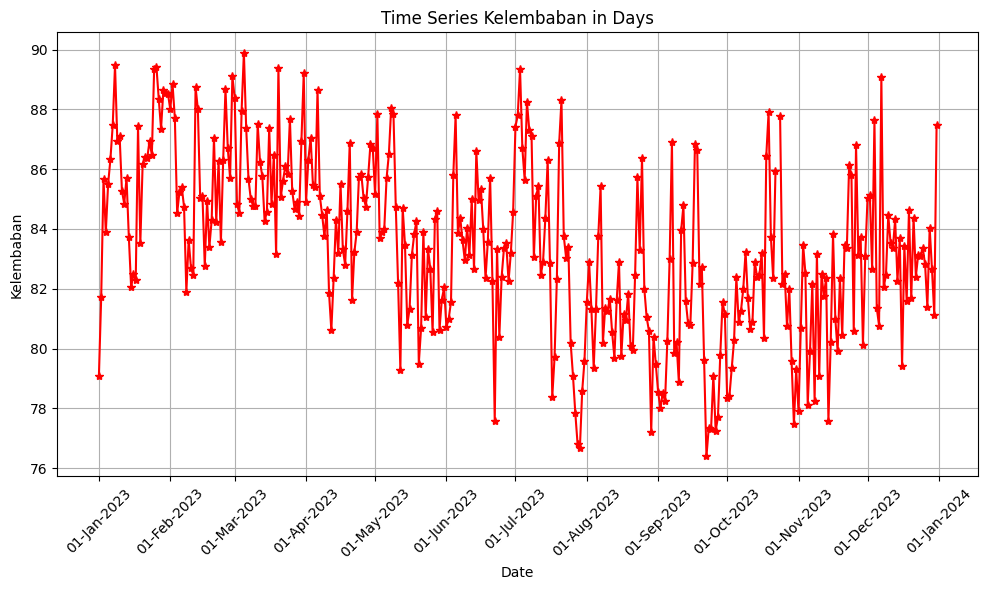

In [4]:

plt.figure(figsize=(10,6))
plt.plot(dates, daily_avg, marker='*', color='r')

# Atur format tanggal di sumbu x untuk menampilkan satu tanggal setiap awal bulan
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Menampilkan tanggal setiap awal bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))  # Format tanggal (misal: 01-Jan-2024)

plt.xticks(rotation=45)

plt.xlabel("Date")
plt.ylabel('Kelembaban')
plt.title(f'Time Series Kelembaban in Days')
plt.grid(True)
plt.tight_layout()

# Tampilkan plot
plt.show()


In [8]:

def process_file(file_path):
    head = pd.read_excel(file_path, usecols = 'C', nrows = 5, header = None )
    head.iloc[:,0] = head.iloc[:, 0].str.replace(": ", "", regex = False)
    station_id = head.iloc[0,0]  # sebagai teks ID
    station_name = head.iloc[1,0] # sebagai nama 
    latitude = float(head.iloc[2,0]) # sebagai lintang
    longitude = float(head.iloc[3,0]) # sebagai bujur
    elevation = float(head.iloc[4,0]) # sebagai elevasi

    data = pd.read_excel(file_path, usecols = "A:K", skiprows = 8)
    
    keterangan_index = data[data.iloc[:, 0].str.contains("Keterangan :", na=False)].index
    if not keterangan_index.empty:
        last_row_index = keterangan_index[0] - 4
        relevant_data = data.loc[:last_row_index]
    else:
        relevant_data = data 
    
    data_transposed = relevant_data.T

    headers = data_transposed.iloc[0].values

    RH_data = data_transposed.iloc[4].values

    RH_df = pd.DataFrame([RH_data], columns = headers)

    return RH_df


file_pattern = 'data_kalimantan/laporan_iklim_harian*.xlsx'
files = glob.glob(file_pattern)

all_data = []

# Memproses setiap file dan menambahkan data Tavg
for file in files:
    df = process_file(file)
    all_data.append(df)

# Menggabungkan semua data ke dalam satu dataframe
final_combined_data = pd.concat(all_data, axis=1)

# Transpose dataframe agar tanggal menjadi index dan Tavg menjadi nilai
final_combined_data = final_combined_data.T

# Konversi indeks menjadi datetime
final_combined_data.index = pd.to_datetime(final_combined_data.index, errors='coerce')

# Mengubah nilai yang lebih dari 500 menjadi NaN
final_combined_data = final_combined_data.where(final_combined_data <= 500)

# Membuat kolom baru untuk menyimpan periode bulanan (Year-Month)
final_combined_data['Month'] = final_combined_data.index.to_series().dt.to_period('M')

# Menghitung rata-rata bulanan dengan groupby berdasarkan kolom 'Month'
monthly_avg = final_combined_data.groupby('Month').mean()


In [9]:
# Mengambil data time series (jika perlu)
time_series_data = df.iloc[0, 5:]

# Konversi kolom tanggal ke tipe datetime
dates = pd.to_datetime(df.columns[5:], dayfirst=True)

# Mengambil nama bulan dari 'dates'
month_names = dates.strftime('%B')

# Menghapus duplikasi jika diperlukan
months = pd.Series(month_names).drop_duplicates()


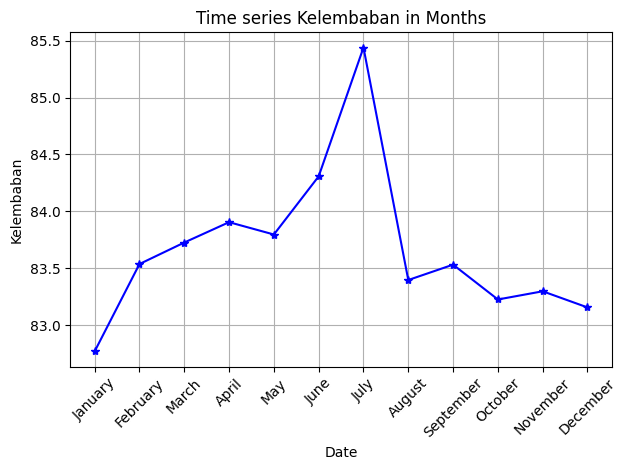

In [11]:
plt.plot(months, monthly_avg, marker = '*', color = 'b')
plt.xticks(rotation = 45)
plt.xlabel("Date")
plt.ylabel('Kelembaban')
plt.title(f'Time series Kelembaban in Months')
plt.grid(True)
plt.tight_layout()